有待温习  
- x趋于有限值时函数极限的定义  
- x趋于无穷时函数极限的定义  
- 梯度与等高线的关系

In [1]:
#导入库
#首次打开文件是需要先运行该程序段，否则后续程序段将会报错
import sympy
from sympy import *
import numpy as np

---
ex2.5:使用Python编程求$$\lim_{x\to\infty}\frac{sinx}{x}$$

In [4]:
x=sympy.Symbol('x')
y=sympy.sin(x)/x
sympy.limit(y,x,oo)

0

sympy库：用于符号运算  
Symbol方法可以理解为将变量符号化，也可以理解成将Python的变量转化为数学意义上的变量
https://www.tutorialspoint.com/sympy/sympy_symbols.htm

In [5]:
#self trial
x=sympy.Symbol('x')
y=sympy.Symbol('y')
expr=x**2+y**3
expr

x**2 + y**3

---
ex 2.6  
使用Python编程求$$\lim_{x \to 1} \frac{x^2-1}{x-1} $$的极限

In [106]:
x=sympy.Symbol('x')
y= (x**2-1)/(x-1)
sympy.limit(y,x,1)

---
ex 2.7  
求$$\lim_{n \to \infty} {\frac{1}{n^2}+\frac{2}{n^2}+\cdots+\frac{n}{n^2} }   $$的极限

In [6]:
n=sympy.Symbol('n')
#y该怎么表示？
#sympy.limit(y,x,oo)

---
ex 2.8  
求$$\lim_{x \to 0} \frac{\sin x}{3x+x^3} $$

In [105]:
x=sympy.Symbol('x')
y=sin(x)/(3*x+x**3)
sympy.limit(y,x,0)

---
ex 2.9 改  
求$$f(x)=
\begin{cases}
  x+1,&  x\le 0 \\
  \frac{\sin x}{x}, &  x> 0
\end{cases}$$在$x=0$处的极限

In [7]:
x=sympy.Symbol('x')
f1=x+1
f2=sin(x)/x
f=Piecewise((f1,x<=0),(f2,x>0))
print(sympy.limit(f,x,0,dir='+'))
print(sympy.limit(f,x,0,dir='-'))

1
1


---
ex 2.10  
分析函数$$f(x)=\frac{x^2-1}{x^2-3x+2} $$的连续性

In [102]:
x=sympy.Symbol('x')
f=(x**2-1)/(x**2-3*x+2)
list_no=[print("x=",i) for i in solveset(Eq(x**2-3*x+2,0),x)] #分母函数为0时对应的x值即为函数没有定义的x值

x= 1
x= 2


判断间断点的类型

In [8]:
def point_tpye(lim1,lim0,fx):
    list_u=['NaN','-oo','oo'] #极限不存在
    if str(lim1) not in list_u and str(lim0) not in list_u: #左右极限是否存在？
        if lim1!=lim0: #左右极限是否相等？
            print("跳跃间断点")
        else:
            if fx!=lim1 or fx=='NaN': #函数值与极限是否相等，或者函数值是否存在？
                print("可去间断点")
            else:
                print("第二类间断点")
    else:
        print("第二类间断点")

点$x=1$、$x=2$为间断点
分别求出两个点的左右极限和对应的函数的值

In [9]:
lim1=sympy.limit(f,x,1,dir='+')
lim0=sympy.limit(f,x,1,dir='-')
fx=f.subs(x,1)
print("在x=1处是",end="")
point_tpye(lim1,lim0,fx)

lim1=sympy.limit(f,x,2,dir='+')
lim0=sympy.limit(f,x,2,dir='-')
fx=f.subs(x,2)
print("在x=2处是",end="")
point_tpye(lim1,lim0,fx)

在x=1处是第二类间断点
在x=2处是第二类间断点


---
ex 2.11  
求函数$$y=\arcsin \sqrt{\sin x} $$的导数

In [10]:
x=sympy.Symbol('x')
y=sympy.asin(sqrt(sin(x)))
diff(y,x)

cos(x)/(2*sqrt(1 - sin(x))*sqrt(sin(x)))

---
ex 2.12  
求$$f(x,y)=x^2+3xy+y^2$$在点$(1,2)$处的偏导数

In [11]:
x,y=sympy.symbols('x y')
z=x**2+3*x*y+y**2
partial_x=diff(z,x)
partial_y=diff(z,y)
print("z对x在点(1,2)处的偏导数为",partial_x.subs({x:1,y:2}))
print("z对y在点(1,2)处的偏导数为",partial_y.subs({x:1,y:2}))

z对x在点(1,2)处的偏导数为 8
z对y在点(1,2)处的偏导数为 7


In [129]:
#答案
from sympy.abc import x,y,z,f  #不同点1
f=x**2+3*x*y+y**2
fx=diff(f,x)
fy=diff(f,y)
print(fx.evalf(subs={x:1,y:2})) #不同点2
print(fy.evalf(subs={x:1,y:2}))

8.00000000000000
7.00000000000000


---
ex 2.13  
求$$z=xe^{2y} $$在点$P(1,0)$处沿从点$Q(2,-1)$方向的方向导数


In [12]:
from sympy.abc import x,y,z,f
f=x*E**(2*y)
fx=diff(f,x)            #z对x的偏导数
fy=diff(f,y)            #z对y的偏导数
t=atan(0-(-1))/(1-2)    #x轴到l方向的转角
fl=fx*cos(t)+fy*sin(t)  #l方向的方向导数
fl.subs({x:1,y:0})      #求点P(1,0)处的方向导数

-sqrt(2)/2

---

- 梯度公式：$$\text{grad}f(x,y)=\frac{\partial f}{\partial x}  \vec{i}+
 \frac{\partial f}{\partial y}  \vec{j}$$  
- 方向导数关于梯度的推导公式:$$\frac{\partial f}{\partial l}=\left | \text{grad} f(x,y) \right |\cdot 
cos\left [\text{grad}f(x,y) \^{}, e_l  \right ] $$
其中$\left [\text{grad}f(x,y) \^{}, e_l  \right ]$表示向量$\text{grad}f(x,y) \^{}$ 和 与方向$l$同方向的单位向量$e_l$的夹角  
- 梯度$\text{grad}f(x,y)$是等高线上点$（x,y）$处的法向量

ex 2.14  
设$u=xyz+z^2+5$，求$\text{grad}\ u$及在点$M(0,1,-1)$处方向导数的最大值

In [45]:
from sympy.abc import x,y,z,u,f
f=x*y*z+z**2+5
fx=diff(f,x)
fy=diff(f,y)
fz=diff(f,z)
M={x:0,y:1,z:-1}
grad=np.array([int(fx.subs(M)),int(fy.subs(M)),int(fz.subs(M))])
print("grad u为",grad)
max_fl=np.linalg.norm(grad,ord=2)
print("在点M处方向导数的最大值为",max_fl)

grad u为 [-1  0 -2]
在点M处方向导数的最大值为 2.23606797749979


---
梯度下降法求函数的最小值  
以一元连续函数$f(x)$举例，初值为$x_0$,步长为$\alpha$，在点$x_0$的梯度为$\text{grad}f(x_0)$，  
则下一个点的坐标为$x_n=x_{n-1}-\alpha \cdot \text{grad}f(x_0) $  
反复迭代，直到$\left | f(x_n)-f(x_{n-1}) \right | $极小才结束，此时的$f(x_n)$即为极小值

ex 2.15  
用梯度下降法求下面函数的最小值，并用Matplotlib、mpl_toolkits库画出函数的图形
$$\min f(x)=x_1-x_2+2x_1^2+2x_1x_2+x_2^2 $$  
给定初值$X^{(0)}=(0,0)^{T}$

In [2]:
#导入库
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sympy.abc import f,x,y

In [3]:
#求偏导函数
f=x-y+2*x**2+2*x*y+y**2
fx=diff(f,x)
fy=diff(f,y)
print(fx)
print(fy)

4*x + 2*y + 1
2*x + 2*y - 1


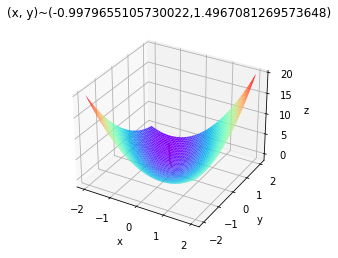

x=-0.9980
y=1.4967


In [19]:
#设函数及其偏导数
def fun(x,y):   #f(x)
    return x - y + 2*(x**2) + 2*x*y + y**2
def pxFun(x,y): #f(x)对x的偏导数
    return 4*x + 2*y + 1
def pyFun(x,y): #f(x)对y的偏导数
    return 2*x + 2*y - 1

#绘图相关变量
fig = plt.figure()  #figure对象
ax = Axes3D(fig)    #Axes3D对象
ax = fig.add_subplot(111, projection='3d')
X, Y = np.mgrid[-2: 2: 40j, -2:2:40j]
Z = fun(X, Y)

#绘图
ax.plot_surface(X, Y, Z, rstride= 1, cstride= 1, cmap= "rainbow")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

#梯度下降
alpha= 0.0008   #步长
x= 0
y= 0
tag_x= [x]
tag_y= [y]
tag_z= [fun(x, y)]
new_x= x
new_y= y
Over= False
while Over == False:
    new_x -= alpha * pxFun(x, y)
    new_y -= alpha * pyFun(x, y)
    if fun(x, y) - fun(new_x, new_y) < 7e-9:
        Over = True
    x = new_x
    y = new_y
    tag_x.append(x)
    tag_y.append(y)
    tag_z.append(fun(x, y))

#输出结果
ax.plot(tag_x, tag_y, tag_z,'r')
plt.title('(x, y)~(' + str(x) + "," + str(y) + ')')
plt.show()
print("x={:.4f}".format(x))
print("y={:.4f}".format(y))

---
课后习题

- 求$$\lim_{x \to 1}\sin {(\ln_{}{x}) } $$

In [32]:
import sympy
from sympy import *
from sympy.abc import x,y
y=sympy.sin(ln(x))
sympy.limit(y,x,1)

0

- 求$$\lim_{x \to 8}\frac{\sqrt[3]{x} - 2}{x-8} $$

In [37]:
import sympy
from sympy import *
from sympy.abc import x,y
y=(pow(x, 1/3)-2)/(x-8)
sympy.limit(y,x,8)

1/12

- 求$$y=x^4-2x^3+5\sin x+\ln_{}{3} $$的导数

In [3]:
import sympy
from sympy import *
from sympy.abc import y,x
y=x**4 - 2*x**3 + 5*sin(x) + ln(3)
sympy.diff(y,x)

4*x**3 - 6*x**2 + 5*cos(x)

- 已知$$z=(3x^2+y^2)^{4x+2y}$$求在点$(1,2)$处的偏导数

In [7]:
import sympy 
from sympy.abc import x,y,z,f
M={x:1,y:2}
f=pow((3*x**2+y**2),(4*x+2*y))
fx=sympy.diff(f,x)
fx.subs(M)

39530064 + 23059204*log(7)

In [8]:
fy=sympy.diff(f,y)
fy.subs(M)

11529602*log(7) + 26353376

- 求$z=x^2+y^2$在点$(1,2)$处沿点$(1,2)$到点$(2,2+\sqrt{3} )$方向的方向导数，以及在点$(1,2)$的梯度

In [34]:
import sympy
from sympy.abc import x,y,z,f
import numpy as np
f= x**2 + y**2
fx= sympy.diff(f, x)
fy= sympy.diff(f, y)
M={x:1,y:2}
P={x:2,y:2+sqrt(3)}
MP=np.array([(P[x]-M[x]),(P[y]-M[y])])  #向量MP的方向与方向l一致
#方向导数
t=atan((MP[1])/(MP[0]))
fl= fx*cos(t) + fy*sin(t)
fl.subs(M)

1 + 2*sqrt(3)

In [36]:
#梯度
grad= np.array([fx.subs(M), fy.subs(M)])
print(grad)

[2 4]
